# Regression
(Concepts & Learnings only)
1. Simple Linear Regression
2. Multiple Linear Regression
3. Polynomial Regression
4. Regularization
    1. Ridge Regression
    2. Lasso Regression
    3. Elastic Net Regression
5. Evaluating Linear Regression




### Simple Linear Regression

**Linear regression is a quiet and the simplest statistical regression method used for predictive analysis in machine learning.**

1. It shows the linear relationship between the independent(predictor) variable i.e. X-axis and the dependent(output) variable i.e. Y-axis, called linear regression

2. If there is a single input variable X(dependent variable), such linear regression is called simple linear regression.

3. Things to look in scatter plot : Direction, Strength and Linearity

### Y= B0 + B1 X.

**B0** -> Slope

**B1** -> Coeffiecient of X variable

**Random Error(Residuals)**

    In regression, the difference between the observed value of the dependent variable(yi) and the predicted value(predicted) is called the residuals.

**εi =  ypredicted –   yi**

**Assumptions :**

1. **Linear relationship** -  relations between the independent and dependent variables must be linear.
Check with Scatter Plot

2. **Multivariate normality** (Normality of Errors) --it suggests that the linear combination of the random variables should have a normal distribution

3. **No or little multicollinearity** - no or little multicollinearity. Multicollinearity is the phenomenon when a number of the explanatory variables are strongly correlated.

4. **No auto-correlation** -- Observations of the error term are uncorrelated with each other

5. **Homoscedasticity** - Homoscedasticity in a model means that the error is constant along the values of the dependent variable.
Check with Scatter and residual plot.


**Linear Relationship :** 

    There should be Linear relatinship exisitng between Dependent & Independent Variables for a linear regression model.
    This can be easily visually investigated using a scatter plot else with a correlation value between independent and dependent variables. *note, Here Correlation between Dependent Variable (y) to independent Variables (X) not between multiple Variables under X.
    
**No or little multicollinearity** - 
 
    Multicollinearity is when there is a strong correlation between independent variables. Linear regression or multilinear regression requires independent variables to have little or no similar features. Multicollinearity can lead to a variety of problems, including:

    The effect of predictor variables estimated by our regression will depend on what other variables are included in our model.
    
    Predictors can have wildly different results depending on the observations in our sample, and small changes in samples can result in very different estimated effects.
    
    With very high multicollinearity, the inverse matrix, the computer calculates may not be accurate.
    
    We can no longer interpret a coefficient on a variable as the effect on the target of a one-unit increase in that variable holding the other variables constant. The reason behind that is, when predictors are strongly correlated, there is not a scenario in which one variable can change without a conditional change in another variable.
    
    Heatmap is an excellent way to identify whether there is multicollinearity or not.
    
    The best way to solve multicollinearity is to use regularization methods like Ridge or Lasso.

**Homoscedasticity ( Constant Variance ):** 

    The assumption of Homoscedasticity is crucial to linear regression models. Homoscedasticity describes a situation in which the error term or variance or the "noise" or random disturbance in the relationship between the independent variables and the dependent variable is the same across all values of the independent variable.
    
    In other words, there is a constant variance present in the response variable as the predictor variable increases. If the "noise" is not the same across the values of an independent variable, we call that **Heteroscedasticity**. As you can tell, it is the opposite of **Homoscedasticity.**

<p><img src="https://www.dummies.com/wp-content/uploads/415147.image1.jpg" style="float:center"></img></p>

    This plot above is an excellent example of Homoscedasticity. As you can see, the residual variance is the same as the value of the predictor variable increases.
    
    One way to fix this Heteroscedasticity is by using a transformation method like log-transformation or box-cox transformation. We will do that later.


**Multivariate Normality ( Normality of Errors):**
        
    The linear regression analysis requires the dependent variable to be multivariate normally distributed. 
    
    A histogram, box plot, or a Q-Q-Plot can check if the target variable is normally distributed. 
    
    The goodness of fit test, e.g., the Kolmogorov-Smirnov test can check for normality in the dependent variable.
    
    Make sure that the target variable follows a normal distribution.

    Trainsforming target variable using numpy.log1p,  may remove hetrodescaity and also bring normality in target variabels
    
    
**No auto-correlation :**

    Auto-Correlation of the regression residuals can also occur if the model is incorrectly specified.
    
    For example, if you are attempting to model a simple linear relationship but the observed relationship is non-linear (i.e., it follows a curved or U-shaped function), then the residuals will be autocorrelated.
    
### Simple Linear Regression    

In [1]:
#Some Expremetal Results:

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

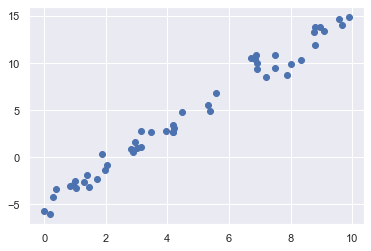

In [2]:
#Generating a random no. just to get b0 and random points for X variable that is linearly
#associated and trying to predict it with Linear Regression SKlearn

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

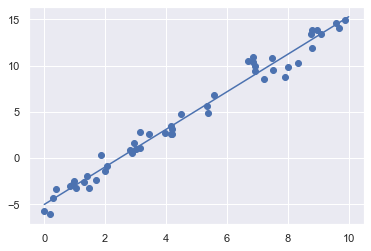

In [3]:
#Fitting the Simple Linear Regression using the randomly generated points and checking if Line is able to predict the result.

from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [4]:
#The slope and intercept of the data are contained in the model's fit parameters, 
#which in Scikit-Learn are always marked by a trailing underscore. 
#Here the relevant parameters are coef_ and intercept_:


print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.0272088103606953
Model intercept: -4.998577085553204


### Multiple Linear Regression


If you would like to improve this result further, you can think about the assumptions of the linear regressions and apply them as we have discussed earlier in this kernel. 


Similar to **Simple Linear Regression**, there is an equation for multiple independent variables to predict a target variable. The equation is as follows.

## $$ \hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n $$

Here, We already know parts of the equation, and from there we can keep adding new features and their coefficients with the equations. Quite simple, isn't it. 

We can have a target variable predicted by multiple independent variables using this equation. Therefore this equation is called **Multiple Linear Regression.** 

In [5]:
#again generating the random data points and Try to predict it using Sklearn Linear Regression
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])



model.fit(X, y)
print(model.intercept_)
print(model.coef_)

# Here the  data is constructed from three random  values, and the linear regression recovers the coefficients 
# used to construct the data.



0.50000000000001
[ 1.5 -2.   1. ]


### Polynomial Regression

Polynomial basis functions

This polynomial projection is useful enough that it is built into Scikit-Learn, using the PolynomialFeatures transformer


In [6]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [7]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

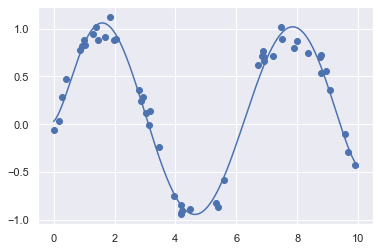

In [8]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

Our linear model, through the use of 7th-order polynomial basis functions, can provide an excellent fit to this non-linear data!



### Regularization


**Bias-Variance Tradeoff**

    When dealing with machine learning models, bias and variance plays an very important role.
    
    It tells us how good or bad our model is and how it performs on new data & Training Data
    
    Lets understand step by step
    
    Bias 
        High Bias - High Training Error
        Low Bias - Low Training Error
        High Bias Leads to Underfitting
        Basically our model is so simple that it is unable to predict the underlying patterns within Data.
        
        low-bias algorithms include: Decision Trees, k-Nearest Neighbors and Support Vector Machines.

        high-bias algorithms include: Linear Regression, Linear Discriminant Analysis and Logistic Regression.
    
    Variance:
        How the model performs on the unseedn data, i.e. Test Error
        High Variance - High Testing Error
        Low Variance - Low Testing Error
        High Variance leads to Overfitting of the Model
        
        
        low-variance algorithms include: Linear Regression, Linear Discriminant Analysis and Logistic Regression.

        high-variance algorithms include: Decision Trees, k-Nearest Neighbors and Support Vector Machines.

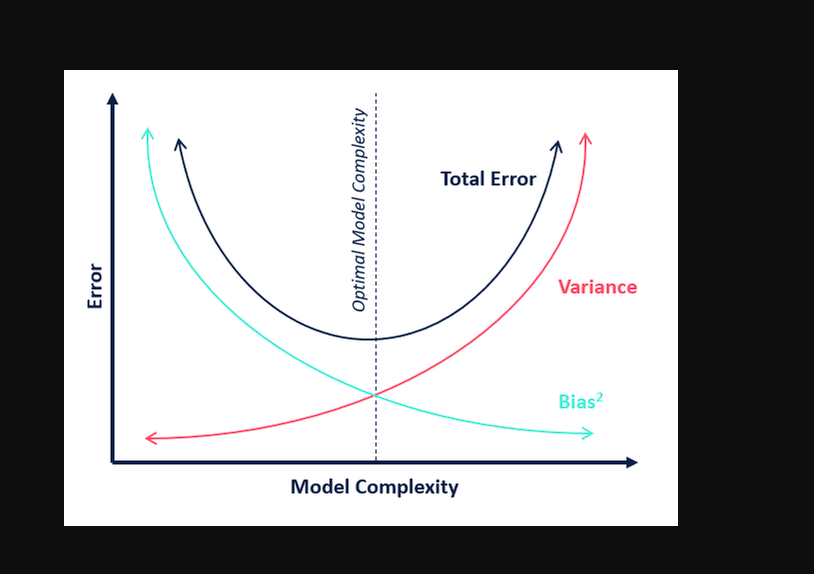

    
    What we Expect ?
        We need to build a model that is neither underfit or nor a overfit which is of Type Low Variance - Low Bias
        Getting a good cutoff between this is important for getting a better model.
        
        There is no escaping the relationship between bias and variance in machine learning.
        Increasing the bias will decrease the variance.
        Increasing the variance will decrease the bias.
    
    How to deal with it?
    
        For Overfitting/High Variance:
            1. Adding more data
            2. Regularization
        
        For Underfitting/High Bias
            1. Use more complicated Model / Change the model
            2. Decrease the the regularization parameter.
            3. Ensure the Data is truly Representative
            


### Regularization Models
What makes regression model more effective is its ability of *regularizing*. The term "regularizing" stands for models ability **to structurally prevent overfitting by imposing a penalty on the coefficients.** 


There are three types of regularizations. 
* **Ridge**
* **Lasso**
* **Elastic Net**

These regularization methods work by penalizing **the magnitude of the coefficients of features** and at the same time **minimizing the error between the predicted value and actual observed values**.  This minimization becomes a balance between the error (the difference between the predicted value and observed value) and the size of the coefficients. The only difference between Ridge and Lasso is **the way they penalize the coefficients.** Elastic Net is the combination of these two. **Elastic Net** adds both the sum of the squares errors and the absolute value of the squared error. To get more in-depth of it, let us review the least squared loss function. 

**Ordinary least squared** loss function minimizes the residual sum of the square(RSS) to fit the data:

### $$ \text{minimize:}\; RSS = \sum_{i=1}^n (y_i - \hat{y}_i)^2 = \sum_{i=1}^n \left(y_i - \left(\beta_0 + \sum_{j=1}^p\beta_j x_j\right)\right)^2 $$

Let's review this equation once again, Here: 
* $y_i$ is the observed value. 
* $\hat{y}_i$ is the predicted value. 
* The error = $y_i$ - $\hat{y}_i$
* The square of the error = $(y_i - \hat{y}_i)^2$
* The sum of the square of the error = $\sum_{i=1}^n (y_i - \hat{y}_i)^2$, that's the equation on the left. 
* The only difference between left sides equation vs. the right sides one above is the replacement of $\hat{y}_i$, it is replaced by $\left(\beta_0 + \sum_{j=1}^p\beta_j x_j\right)$, which simply follow's the slope equation, y = mx+b, where, 
* $\beta_0$ is the intercept. 
* **$\beta_j$ is the coefficient of the feature($x_j$).**

Let's describe the effect of regularization and then we will learn how we can use loss function in Ridge.
* One of the benefits of regularization is that it deals with **multicollinearity**(high correlation between predictor variables) well, especially Ridge method. Lasso deals with **multicollinearity** more brutally by penalizing related coefficients and force them to become zero, hence removing them. However, **Lasso** is well suited for redundant variables. 
 
***
<div>
    
    
    
### Lasso:
Lasso adds penalty equivalent to the absolute value of the sum of coefficients. This penalty is added to the least square loss function and replaces the squared sum of coefficients from Ridge. 

## $$ \text{minimize:}\; RSS + Lasso = \sum_{i=1}^n \left(y_i - \left(\beta_0 + \sum_{j=1}^p\beta_j x_j\right)\right)^2 + \lambda_1\sum_{j=1}^p |\beta_j|$$

Here, 
* $\lambda_2$ is a constant similar to the Ridge function. 
* $\sum_{j=1}^p |\beta_j|$ is the absolute sum of the coefficients.
    
    
    
 ### Ridge:
Ridge regression adds penalty equivalent to the square of the magnitude of the coefficients. This penalty is added to the least square loss function above and looks like this...

### $$ \text{minimize:}\; RSS+Ridge = \sum_{i=1}^n \left(y_i - \left(\beta_0 + \sum_{j=1}^p\beta_j x_j\right)\right)^2 + \lambda_2\sum_{j=1}^p \beta_j^2$$

Here, 
* $\lambda_2$ is constant; a regularization parameter. It is also known as $\alpha$. The higher the value of this constant the more the impact in the loss function. 
    * When $\lambda_2$ is 0, the loss funciton becomes same as simple linear regression. 
    * When $\lambda_2$ is $\infty$, the coefficients become 0
    * When $\lambda_2$ is between  0 and $\infty$(0<$\lambda_2$<$\infty$), The $\lambda_2$ parameter will decide the miagnitude given to the coefficients. The coefficients will be somewhere between 0 and ones for simple linear regression. 
* $\sum_{j=1}^p \beta_j^2$, is the squared sum of all coefficients. 

Now that we know every nitty-gritty details about this equation, let's use it for science, but before that a couple of things to remember. 
    
* **It is essential to standardize the predictor variables before constructing the models.** 
* **It is important to check for multicollinearity,**
    
### Elastic Net: 
Elastic Net is the combination of both Ridge and Lasso. It adds both the sum of squared coefficients and the absolute sum of the coefficients with the ordinary least square function. Let's look at the function. 

### $$ \text{minimize:}\; RSS + Ridge + Lasso = \sum_{i=1}^n \left(y_i - \left(\beta_0 + \sum_{j=1}^p\beta_j x_j\right)\right)^2 + \lambda_1\sum_{j=1}^p |\beta_j| + \lambda_2\sum_{j=1}^p \beta_j^2$$

This equation is pretty self-explanatory if you have been following this kernel so far.

### Evaluating the Regression Models

**Cost function**

    A cost function measures how much error in the model is in terms of ability to estimate the relationship between  𝑥  and  𝑦 . We can measure the accuracy of our hypothesis function by using a cost function. This takes an average difference of observed dependent variable in the given the dataset and those predicted by the hypothesis function.

                                    𝐉(𝜃)=1𝐦∑𝐢=1𝐦(𝐲̂ 𝐢−𝐲𝐢)2

    To minimize our cost function, take partial derivative of  𝐉(𝜃)  with respect to  𝜃  and equate to  0 . The derivative of function is nothing but if a small change in input what would be the change in output of function.
                        
                        𝐦𝐢𝐧𝜃0,𝜃1..𝜃𝐧 𝐉(𝜃0,𝜃1..𝜃𝐧)
 
                            ∂𝐉(𝜃𝐣)/∂𝜃𝐣=0
 
                        where  𝐣=0,1,2,....𝐧

    We will predict value for target variable by using our model parameter for test data set. Then compare the predicted value with actual valu in test set. We compute Mean Square Error using formula




    The evaluation metrics often named in such a way that I find it confusing to remember. So, this is a guide for me and everyone else who is reading it. There are many evaluation metrics. Let's name a few of them. 

    It may seem confusing with multiple similar abbreviations, but once we focus on what they each do, things will become much more intuitive. For now, I am going to dive right into the $R^2$.

# $R^2$(The "Coefficient of determination"): 
> $R^2$ describes the proportion of variance of the dependent variable explained by the regression model. Let's write the equation for $R^2$. 

# $$ \operatorname{R^2} = \frac{SSR}{SST} $$

Here,

* SST(Sum of the Total Squared Error) is the total residual. It is also known as TSS(Total Sum of the Squared Error)
* SSR(Sum of the Squared Regression) is the residual explained by the regression line. SSR is also known as ESS(Explained Sum of the Squared Error)

and

* SSE(Sum of the Squared Error)/RSS(Residual Sum of the Squared Error)
Let's break these down. 

## SST/TSS:
SST is the sum of the squared distance from all points to average line ( $\bar{y}$ ). We call this the **total variation** in the Y's of the **Total Sum of the Squares(SST).** Let's see it in the function. 
### $$ \operatorname{SST} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

Here
* $y_i$ = Each observed data point. 
* $\bar{y}$ = Mean of y value.
* $\hat{y_i}$ = Predicted data point for each $x_i$ depending on i. 

A visualization would make things much more clear.
![](http://blog.hackerearth.com/wp-content/uploads/2016/12/anat.png)
 
In this visualization above, the light green line is the <font color="green"><b>average line</b></font> and the black dot is the observed value. So, SST describes the distance between the black dot and the <font color="green"><b>average line</b></font>.


## SSR/ESS:
SSR is the sum of the squared residual between each predicted value and the average line. In statistics language we say that, SSR is the squared residual explained by the regression line. In the visualization above SSR is the distance from <font color='green'><b>baseline model</b></font> to the <font color = 'blue'><b>regression line.</b></font> 
### $$ SSR = \sum_{i=1}^n \left(\hat{y_i} - \bar{y}\right)^2 $$

## SSE/RSS: 
RSS is calculated by squaring each residual of the data points and then adding them together. This residual is the difference between the predicted line and the observed value. In statistics language, we say, SSE is the squared residual that was not explained by the regression line, and this is the quantity least-square minimizes. In the chart above SSE is the distance of the actual data point from the <font color = 'blue'><b>regression line</b></font>. 

### $$ SSE = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

And the relation between all three of these metrics is
## $$SST = SSR + SSE$$


From the equation above and the $R^2$ equation from the top we can modify the $R^2$ equation as the following
# $$ R^2 = 1 - \frac{SSE}{SST} $$

## More on $R^2$: 
* $R^2$ is matric with a value between 0 and 1. 
* If the points are perfectly linear, then error sum of squares is 0, In that case, SSR = SST. Which means the variation in the Y's is completely explained by the regression line causing the value of $R^2$ to be close to 1. 
* In other extreme cases, when there is no relation between x and y, hence SSR = 0 and therefore SSE = SST, The regression line explains none of the variances in Y causing $R^2$ to be close to 0.
* $R^2$ measures the explanatory power of the model; The more of the variance in the dependent variable(Y) the model can explain, the more powerful it is.
* $R^2$ can be infinitely negative as well. Having a negative indicates that the predictive equation has a greater error than the baseline model.
* The value of $R^2$ increases as more feature gets added despite the effectiveness of those features in the model.
* This is a problem, since we may think that having a greater $R^2$ means a better model, even though the model didnot actually improved. In order to get around this we use Adjusted R-Squared($R^2_{adj}$)

**Adjusted R-Squared($R^2_{adj}$)**: 

$R^2_{adj}$ is similar to $R^2$. However, the value of$R^2_{adj}$ decreases if we use a feature that doesn't improve the model significantly. Let's write the equation for $R^2_{adj}$. 

## $$ {R^2_{adj}} = 1 - [\frac{(1 - R^2)(n-1)}{(n-k-1)}]$$

here, 
* n = # of datapoints. 
* k = # of feature used. 

As you can see from the equation, the increase of k(feature) in the denumerator penilizes the adjusted $R^2$ value if there is not a significant improvement of $R^2$ in the numerator.  

    Now, we need to introduce a couple of evaluation metrics that will help us compare and contrast models. One of them is mean squared error(MSE) which we used while comparing two models. Some of the other metrics are...

* RMSE (Root Mean Squared Error)
### $$ \operatorname{RMSE}= \sqrt{\frac{1}{n}\sum_{i=1}^n(\hat{y_i} - y_i)^2} $$

Here
* $y_i$ = Each observed data point. 
* $\bar{y}$ = Mean of y value.
* $\hat{y_i}$ = Predicted data point for each $x_i$ depending on i. 


* MSE(Mean Squared Error)
### $$\operatorname{MSE}= \frac{1}{n}\sum_{i=1}^n(\hat{y_i} - y_i)^2$$

* MAE (Mean Absolute Error)
### $$\operatorname{MAE} = \frac{\sum_{i=1}^n|{\bar{y} - y_i}|}{n}$$

* RSE (Relative Squared Error)
### $$\operatorname{RSE}= \frac{\sum_{i=1}^n(\hat{y_i} - y_i)^2}{\sum_{i=1}^n(\bar{y} - y_i)^2}$$

* RAE (Relative Absolute Error) 
### $$\operatorname{RAE}= \frac{\sum_{i=1}^n |\hat{y_i} - y_i|}{\sum_{i=1}^n |\bar{y} - y_i|}$$



So, from the Evaluation section above, we know that, 
### $$ RSS = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

And, we already know ...
## $$ \hat{y} = \beta_0 + \beta_1 x + \epsilon \\ $$

Let's plug in( $\hat{Y}$  ) equation in the RSS equation and we get...
$$RSS = \sum_{i=1}^n \left(y_i - \left(\beta_0 + \sum_{j=1}^p\beta_j x_j\right)\right)^2 $$

This equation is also known as the loss function. Here, **"loss"** is the sum of squared residuals(More on this later). 



### This notebook is always work in progress, i add knew content as i learn more!!
